Sistem Rekomendasi Wisata Bandung

In [ ]:
Total Data Berdasarkan Primary key Place_Id

project ini akan merekomendasikan rekomendasui wisata dari satu kota

In [ ]:
pip install wget

In [ ]:
import wget
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import zipfile

In [ ]:
# load the dataset
local_zip = '/content/data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

##Data Understanding

In [ ]:
wisata = pd.read_csv('/content/tourism_with_id.csv')
pengunjung = pd.read_csv('/content/user.csv')
rating_wisata = pd.read_csv('/content/tourism_rating.csv')

Total Data Berdasarkan Primary key Place_Id

project ini akan merekomendasikan rekomendasui wisata dari satu kota

In [ ]:
print('Jumlah Wisata :', len(wisata.Place_Id.unique()))
print('Jumlah Data User :', len(pengunjung.User_Id.unique()))
print('Jumlah Data Rating Wisata :', len(rating_wisata.Place_Id.unique()))
print('=============================')
print('Jumlah Semua Data Wisata :', len(wisata))
print('Jumlah Semua Data User :', len(pengunjung))
print('Jumlah Semua Data Rating Wisata :', len(rating_wisata))

Jumlah Wisata : 437
Jumlah Data User : 300
Jumlah Data Rating Wisata : 437
Jumlah Semua Data Wisata : 437
Jumlah Semua Data User : 300
Jumlah Semua Data Rating Wisata : 10000


Mencetak jumlah nilai unik dari kolom kunci utama di setiap DataFrame (Place_Id di wisata dan rating_wisata, serta User_Id di pengunjung). Ini memberikan gambaran tentang jumlah entitas unik dalam setiap dataset. Kemudian, mencetak jumlah total baris di setiap DataFrame.

##Exploratory Data

Data destinasi Wisata

In [ ]:
wisata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


Menampilkan ringkasan DataFrame wisata, termasuk tipe data setiap kolom, jumlah nilai non-null, dan penggunaan memori. Ini membantu dalam memahami struktur data.

In [ ]:
wisata.isna().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


Menghitung dan menampilkan jumlah nilai yang hilang (NaN) di setiap kolom DataFrame wisata. Ini penting untuk mengidentifikasi kolom yang memerlukan penanganan nilai yang hilang.

In [ ]:
wisata.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


Menampilkan lima baris pertama DataFrame wisata. Ini memberikan tampilan awal dari data.

In [ ]:
print('Banyak Data :', len(wisata.Place_Id.unique()))
print('Nama Kota :', wisata.City.unique())

Banyak Data : 437
Nama Kota : ['Jakarta' 'Yogyakarta' 'Bandung' 'Semarang' 'Surabaya']


Mencetak jumlah nilai unik dari Place_Id di DataFrame wisata (yang sudah dilakukan sebelumnya, tapi diulang di sini) dan menampilkan daftar nama kota unik yang ada di kolom City DataFrame wisata.

In [ ]:
wisata = wisata.drop('Unnamed: 11', axis=1)
wisata = wisata.drop('Unnamed: 12', axis=1)

Menghapus kolom 'Unnamed: 11' dan 'Unnamed: 12' dari DataFrame wisata. Argumen axis=1 menunjukkan bahwa yang dihapus adalah kolom.

In [ ]:
wisata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 37.7+ KB


Menampilkan kembali ringkasan DataFrame wisata setelah kolom yang tidak diperlukan dihapus untuk memverifikasi perubahan.

In [ ]:
wisata.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


Menampilkan beberapa baris pertama DataFrame wisata setelah penghapusan kolom.

            jumlah destinasi Wisata /kota  persentase
City                                                 
Yogyakarta                            126        28.8
Bandung                               124        28.4
Jakarta                                84        19.2
Semarang                               57        13.0
Surabaya                               46        10.5


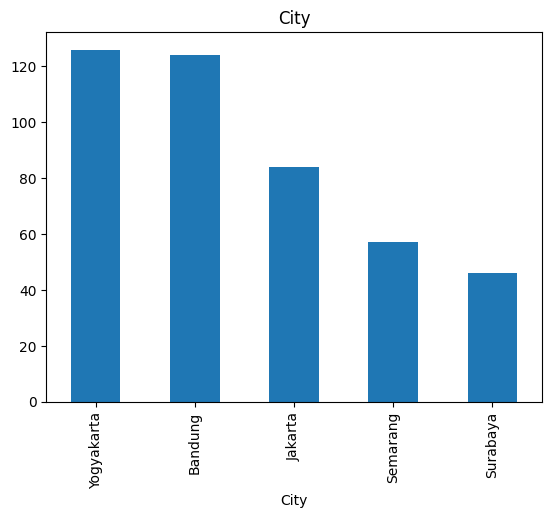

In [ ]:
feature = 'City'
count = wisata[feature].value_counts()
percent = 100*wisata[feature].value_counts(normalize=True)
city = pd.DataFrame({'jumlah destinasi Wisata /kota':count, 'persentase':percent.round(1)})
print(city)
count.plot(kind='bar', title=feature);

Menghitung jumlah destinasi wisata untuk setiap kota menggunakan value_counts(). Kemudian, menghitung persentase setiap kota dari total destinasi. Hasilnya ditampilkan dalam DataFrame bernama city dan divisualisasikan dalam bentuk bar chart.

In [ ]:
pengunjung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


Menampilkan ringkasan DataFrame pengunjung, termasuk tipe data setiap kolom dan jumlah nilai non-null.

In [ ]:
pengunjung.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


Menampilkan beberapa baris pertama DataFrame pengunjung.

In [ ]:
print(pengunjung.shape)

(300, 3)


Mencetak dimensi (jumlah baris dan kolom) dari DataFrame pengunjung.

Rating wisata

In [ ]:
rating_wisata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


Menampilkan ringkasan DataFrame rating_wisata, termasuk tipe data setiap kolom dan jumlah nilai non-null.

In [ ]:
rating_wisata.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


Menampilkan beberapa baris pertama DataFrame rating_wisata.

In [ ]:
rating_wisata.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


Menampilkan statistik deskriptif untuk kolom numerik di DataFrame rating_wisata, seperti mean, standard deviation, min, max, dan kuartil.

In [ ]:
print('Jumlah Pengunjung :', len(rating_wisata.User_Id.unique()))
print('Jumlah Wisata :', len(rating_wisata.Place_Id.unique()))
print('Jumlah Rating :', len(rating_wisata))

Jumlah Pengunjung : 300
Jumlah Wisata : 437
Jumlah Rating : 10000


Mencetak jumlah nilai unik dari User_Id dan Place_Id di DataFrame rating_wisata, serta jumlah total baris di DataFrame tersebut.

##Data Preprocessing

In [ ]:
wisata_bandung = wisata[wisata['City']=='Bandung']
wisata_bandung

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
210,211,GunungTangkuban perahu,Gunung Tangkuban Parahu adalah salah satu gunu...,Cagar Alam,Bandung,30000,4.5,NaN,"{'lat': -6.759637700000001, 'lng': 107.6097807}",-6.759638,107.609781
211,212,Jalan Braga,Jalan Braga adalah nama sebuah jalan utama di ...,Budaya,Bandung,0,4.7,NaN,"{'lat': -6.9150534, 'lng': 107.6089842}",-6.915053,107.608984
212,213,Gedung Sate,"Gedung Sate, dengan ciri khasnya berupa orname...",Budaya,Bandung,5000,4.6,NaN,"{'lat': -6.9024812, 'lng': 107.61881}",-6.902481,107.618810
213,214,Trans Studio Bandung,Trans Studio Bandung adalah kawasan wisata ter...,Taman Hiburan,Bandung,280000,4.5,240.0,"{'lat': -6.9250943, 'lng': 107.6364944}",-6.925094,107.636494
214,215,Taman Hutan Raya Ir. H. Djuanda,Taman Hutan Raya Ir. H. Djuanda (Tahura Djuand...,Cagar Alam,Bandung,15000,4.5,90.0,"{'lat': -6.8565791, 'lng': 107.6323734}",-6.856579,107.632373
...,...,...,...,...,...,...,...,...,...,...,...
329,330,Bandros City Tour,Bandros atau Bus Wisata Bandung adalah bus wis...,Budaya,Bandung,40000,4.4,NaN,"{'lat': -6.922081599999999, 'lng': 107.6073182}",-6.922082,107.607318
330,331,Kyotoku Floating Market,"Kyotoku Floating Market Bandung, sebuah wisata...",Budaya,Bandung,175000,4.5,150.0,"{'lat': -6.819874999999999, 'lng': 107.618707}",-6.819875,107.618707
331,332,Rainbow Garden,Rainbow Garden Harapan Indah salah satu taman ...,Cagar Alam,Bandung,20000,4.6,90.0,"{'lat': -6.8179514, 'lng': 107.618914}",-6.817951,107.618914
332,333,Kota Mini,Destinasi yang sangat menarik bernuansa eropa ...,Taman Hiburan,Bandung,20000,4.4,NaN,"{'lat': -6.818688799999999, 'lng': 107.6169403}",-6.818689,107.616940


Membuat DataFrame baru bernama wisata_bandung yang hanya berisi baris-baris dari DataFrame wisata di mana nilai kolom City adalah 'Bandung'.

In [ ]:
rating_wisata_bandung = pd.merge(rating_wisata, wisata_bandung[['Place_Id']], how='right', on='Place_Id')
rating_wisata_bandung

,User_Id,Place_Id,Place_Ratings
0,9,211,3
1,26,211,2
2,40,211,3
3,40,211,2
4,70,211,5
...,...,...,...
2837,224,334,5
2838,252,334,2
2839,269,334,1
2840,270,334,1


Menggabungkan DataFrame rating_wisata dengan DataFrame wisata_bandung menggunakan kunci Place_Id. Penggabungan dilakukan dengan tipe 'right' join, yang berarti semua baris dari wisata_bandung akan dipertahankan, dan data rating dari rating_wisata akan ditambahkan jika Place_Id cocok. Ini bertujuan untuk mendapatkan rating hanya untuk wisata yang ada di Bandung.

In [ ]:
user_bandung = pd.merge(pengunjung, rating_wisata_bandung[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user_bandung

,User_Id,Location,Age
260,1,"Semarang, Jawa Tengah",20
1178,2,"Bekasi, Jawa Barat",21
279,3,"Cirebon, Jawa Barat",23
418,4,"Bekasi, Jawa Barat",21
1655,5,"Lampung, Sumatera Selatan",20
...,...,...,...
67,296,"Lampung, Sumatera Selatan",31
151,297,"Palembang, Sumatera Selatan",39
235,298,"Bogor, Jawa Barat",38
236,299,"Sragen, Jawa Tengah",27


Menggabungkan DataFrame pengunjung dengan kolom User_Id dari rating_wisata_bandung menggunakan 'right' join. Ini akan menghasilkan DataFrame yang berisi data pengunjung yang telah memberikan rating di Bandung. Kemudian, baris duplikat dihapus dan DataFrame diurutkan berdasarkan User_Id.

In [ ]:
all_wisata_bandung = rating_wisata_bandung
all_wisata_bandung

,User_Id,Place_Id,Place_Ratings
0,9,211,3
1,26,211,2
2,40,211,3
3,40,211,2
4,70,211,5
...,...,...,...
2837,224,334,5
2838,252,334,2
2839,269,334,1
2840,270,334,1


In [ ]:
Membuat salinan dari DataFrame rating_wisata_bandung dan menyimpannya dalam variabel baru bernama all_wisata_bandung.

In [ ]:
all_wisata_bandung = pd.merge(all_wisata_bandung,
                               wisata_bandung[['Place_Id','Place_Name','Category']],
                               on='Place_Id',
                               how='left')
all_wisata_bandung

,User_Id,Place_Id,Place_Ratings,Place_Name,Category
0,9,211,3,GunungTangkuban perahu,Cagar Alam
1,26,211,2,GunungTangkuban perahu,Cagar Alam
2,40,211,3,GunungTangkuban perahu,Cagar Alam
3,40,211,2,GunungTangkuban perahu,Cagar Alam
4,70,211,5,GunungTangkuban perahu,Cagar Alam
...,...,...,...,...,...
2837,224,334,5,Chingu Cafe Little Seoul,Taman Hiburan
2838,252,334,2,Chingu Cafe Little Seoul,Taman Hiburan
2839,269,334,1,Chingu Cafe Little Seoul,Taman Hiburan
2840,270,334,1,Chingu Cafe Little Seoul,Taman Hiburan


In [ ]:
Menggabungkan DataFrame all_wisata_bandung dengan kolom Place_Id, Place_Name, dan Category dari DataFrame wisata_bandung. Penggabungan ini dilakukan dengan 'left' join berdasarkan Place_Id untuk menambahkan nama dan kategori wisata ke data rating.

##Data Preparation

In [ ]:
all_wisata_bandung.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0
Place_Name,0
Category,0


In [ ]:
Menghitung dan menampilkan jumlah nilai yang hilang (NaN) di setiap kolom DataFrame all_wisata_bandung.

In [ ]:
print('Banyak Data Wisata Bandung :', len(all_wisata_bandung.Place_Name.unique()))
print('Wisata Bandung :', all_wisata_bandung.Place_Name.unique())

Banyak Data Wisata Bandung : 124
Wisata Bandung : ['GunungTangkuban perahu' 'Jalan Braga' 'Gedung Sate'
 'Trans Studio Bandung' 'Taman Hutan Raya Ir. H. Djuanda'
 'Farm House Susu Lembang' 'Kebun Binatang Bandung' 'Kawah Putih'
 'Tebing Karaton' 'Dusun Bambu' 'Museum Geologi Bandung'
 'Museum Konferensi Asia Afrika' 'Masjid Raya Bandung' 'Dago Dreampark'
 'Orchid Forest Cikole' 'Kawasan Punclut' 'Alun-Alun Kota Bandung'
 'Museum Sri Baduga' 'Rabbit Town' 'Stone Garden Citatah'
 'The Great Asia Africa' 'Bukit Moko' 'Gunung Papandayan'
 'Amazing Art World' 'Gua Belanda' 'Taman Balai Kota Bandung'
 'Panghegar Waterboom Bandung' 'Gunung Manglayang' 'Lembang Park & Zoo'
 'Taman Lalu Lintas Ade Irma Suryani Nasution'
 'Lawangwangi Creative Space' 'Curug Dago' 'Kampung Korea Bandung'
 'Kampung Batu Malakasari' 'Jendela Alam' 'Curug Tilu Leuwi Opat'
 'Kiara Artha Park' 'NuArt Sculpture Park' 'Upside Down World Bandung'
 'Pesona Nirwana Waterpark & Cottages' 'Taman Lansia' 'Kampoeng Tulip'
 'Se

Mencetak jumlah nilai unik dari Place_Name di DataFrame all_wisata_bandung dan menampilkan daftar nama wisata unik tersebut.

In [ ]:
preparation = all_wisata_bandung
preparation.sort_values('Place_Id')

,User_Id,Place_Id,Place_Ratings,Place_Name,Category
12,135,211,1,GunungTangkuban perahu,Cagar Alam
13,160,211,5,GunungTangkuban perahu,Cagar Alam
10,124,211,2,GunungTangkuban perahu,Cagar Alam
11,129,211,4,GunungTangkuban perahu,Cagar Alam
16,220,211,4,GunungTangkuban perahu,Cagar Alam
...,...,...,...,...,...
2834,186,334,4,Chingu Cafe Little Seoul,Taman Hiburan
2833,185,334,4,Chingu Cafe Little Seoul,Taman Hiburan
2831,171,334,3,Chingu Cafe Little Seoul,Taman Hiburan
2832,177,334,3,Chingu Cafe Little Seoul,Taman Hiburan


Membuat salinan dari DataFrame all_wisata_bandung dan menyimpannya dalam variabel bernama preparation. Kemudian, mengurutkan DataFrame preparation berdasarkan kolom Place_Id.

In [ ]:
preparation = preparation.drop_duplicates('Place_Id')
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Category
0,9,211,3,GunungTangkuban perahu,Cagar Alam
28,19,212,3,Jalan Braga,Budaya
44,7,213,3,Gedung Sate,Budaya
68,13,214,5,Trans Studio Bandung,Taman Hiburan
86,28,215,5,Taman Hutan Raya Ir. H. Djuanda,Cagar Alam
...,...,...,...,...,...
2725,17,330,3,Bandros City Tour,Budaya
2745,9,331,4,Kyotoku Floating Market,Budaya
2777,18,332,2,Rainbow Garden,Cagar Alam
2800,19,333,4,Kota Mini,Taman Hiburan


Menghapus baris duplikat dari DataFrame preparation berdasarkan nilai unik di kolom Place_Id. Ini memastikan setiap destinasi wisata hanya muncul sekali.

                    jumlah Sebaran Category Wisata Bandung  persentase
Category                                                              
Cagar Alam                                              54        43.5
Taman Hiburan                                           39        31.5
Budaya                                                  22        17.7
Tempat Ibadah                                            8         6.5
Pusat Perbelanjaan                                       1         0.8


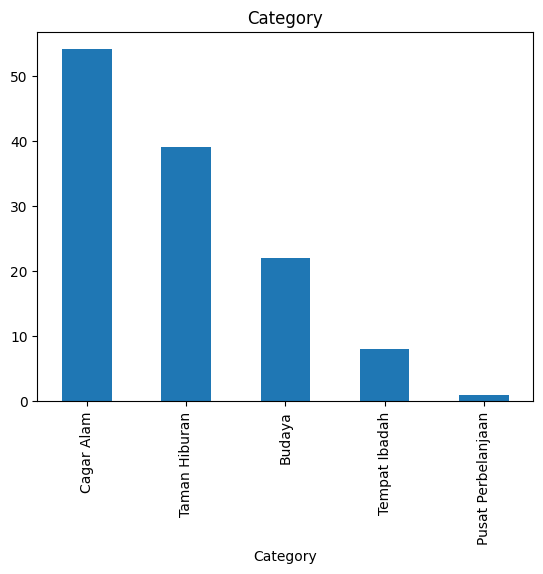

In [ ]:
feature = 'Category'
count = preparation[feature].value_counts()
percent = 100*preparation[feature].value_counts(normalize=True)
kategori = pd.DataFrame({'jumlah Sebaran Category Wisata Bandung':count, 'persentase':percent.round(1)})
print(kategori)
count.plot(kind='bar', title=feature);

Menghitung jumlah destinasi wisata untuk setiap kategori menggunakan value_counts(). Kemudian, menghitung persentase setiap kategori dari total destinasi. Hasilnya ditampilkan dalam DataFrame bernama kategori dan divisualisasikan dalam bentuk bar chart.

In [ ]:
from os import pread
id_wisata = preparation['Place_Id'].tolist()
nama_wisata = preparation['Place_Name'].tolist()
kategori_wisata = preparation['Category'].tolist()

print(len(id_wisata))
print(len(nama_wisata))
print(preparation.Category.unique())

124
124
['Cagar Alam' 'Budaya' 'Taman Hiburan' 'Tempat Ibadah'
 'Pusat Perbelanjaan']


Mengambil daftar nilai dari kolom Place_Id, Place_Name, dan Category dari DataFrame preparation dan menyimpannya dalam list. Kemudian, mencetak panjang list id_wisata dan nama_wisata, serta menampilkan daftar kategori unik.

In [ ]:
new_wisata = pd.DataFrame({
    'id': id_wisata,
    'nama_wisata': nama_wisata,
    'kategori_wisata': kategori_wisata
})
new_wisata

,id,nama_wisata,kategori_wisata
0,211,GunungTangkuban perahu,Cagar Alam
1,212,Jalan Braga,Budaya
2,213,Gedung Sate,Budaya
3,214,Trans Studio Bandung,Taman Hiburan
4,215,Taman Hutan Raya Ir. H. Djuanda,Cagar Alam
...,...,...,...
119,330,Bandros City Tour,Budaya
120,331,Kyotoku Floating Market,Budaya
121,332,Rainbow Garden,Cagar Alam
122,333,Kota Mini,Taman Hiburan


Membuat DataFrame baru bernama new_wisata menggunakan list id_wisata, nama_wisata, dan kategori_wisata. DataFrame ini berisi informasi dasar tentang setiap destinasi wisata.


##Pemodelan Menggunakan Content-Based Filtering

In [ ]:
data = new_wisata
data.sample(5)

,id,nama_wisata,kategori_wisata
106,317,Curug Cimahi,Cagar Alam
22,233,Gunung Papandayan,Cagar Alam
90,301,Lereng Anteng Panoramic Coffee Place,Cagar Alam
7,218,Kawah Putih,Cagar Alam
19,230,Stone Garden Citatah,Taman Hiburan


Menyalin DataFrame new_wisata ke dalam variabel data dan menampilkan 5 baris sampel acak dari DataFrame data.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
tf = CountVectorizer()

tf.fit(data['kategori_wisata'])
tf.get_feature_names_out()

array(['alam', 'budaya', 'cagar', 'hiburan', 'ibadah', 'perbelanjaan',
       'pusat', 'taman', 'tempat'], dtype=object)

In [ ]:
Mengimpor CountVectorizer dari sklearn.feature_extraction.text dan numpy. Menginisialisasi CountVectorizer bernama tf. Menerapkan fit() pada kolom kategori_wisata untuk mempelajari kosakata unik dari kategori. Kemudian, menampilkan nama fitur (kategori unik) yang dipelajari.

In [ ]:
tfidf_matrix = tf.fit_transform(data['kategori_wisata'])
tfidf_matrix.shape

(124, 9)

In [ ]:
Menerapkan fit_transform() pada kolom kategori_wisata menggunakan CountVectorizer. Ini mengubah kategori teks menjadi matriks di mana setiap baris mewakili destinasi wisata dan setiap kolom mewakili kategori, dengan nilai yang menunjukkan berapa kali kategori tersebut muncul dalam destinasi. Menampilkan dimensi matriks yang dihasilkan.

In [ ]:
np.set_printoptions(threshold=np.inf)
print(tfidf_matrix.todense())

[[1 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0]
 [1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0]
 [1 0 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0]
 [1 0 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0]
 [1 0 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0]
 [1 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0]
 [1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0

Mengatur opsi cetak NumPy untuk menampilkan seluruh array tanpa pemotongan (threshold=np.inf). Kemudian, mengubah matriks hitungan kata (yang biasanya dalam format sparse) menjadi format dense dan mencetaknya. Ini berguna untuk melihat isi matriks, meskipun untuk matriks besar ini bisa menghabiskan banyak memori dan output.

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.nama_wisata
).sample(10, axis=1, replace=True).sample(10, axis=0)

,tempat,perbelanjaan,hiburan,tempat,pusat,perbelanjaan,cagar,perbelanjaan,pusat,ibadah
nama_wisata,,,,,,,,,,
Masjid Daarut Tauhiid Bandung,1,0,0,1,0,0,0,0,0,1
Mountain View Golf Club,0,0,0,0,0,0,1,0,0,0
Jalan Braga,0,0,0,0,0,0,0,0,0,0
Sanghyang Heuleut,0,0,0,0,0,0,1,0,0,0
Bukit Jamur,0,0,0,0,0,0,1,0,0,0
Taman Jomblo,0,0,1,0,0,0,0,0,0,0
Museum Pendidikan Nasional,0,0,0,0,0,0,0,0,0,0
Situ Patenggang,0,0,0,0,0,0,1,0,0,0
Pasar Baru,0,1,0,0,1,1,0,1,1,0


Membuat DataFrame pandas dari matriks hitungan kata (dalam format dense). Kolom diberi nama berdasarkan fitur (kategori) yang dipelajari oleh CountVectorizer, dan indeks diberi nama berdasarkan nama wisata. Kemudian, menampilkan sampel acak dari kolom dan baris DataFrame ini.

Menghitung Consine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
        1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       

Mengimpor cosine_similarity dari sklearn.metrics.pairwise. Menghitung matriks Cosine Similarity antara semua destinasi wisata berdasarkan matriks hitungan kata (tfidf_matrix). Matriks ini menunjukkan seberapa mirip setiap pasangan destinasi berdasarkan kategori mereka.

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['nama_wisata'], columns=data['nama_wisata'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (124, 124)


nama_wisata,Kawah Rengganis Cibuni,Saung Angklung Mang Udjo,Babakan Siliwangi City Forest Path Bandung,Masjid Raya Bandung,Sunrise Point Cukul
nama_wisata,,,,,
Teras Cikapundung BBWS,0.0,0.0,0.0,0.0,0.0
Pesona Nirwana Waterpark & Cottages,0.0,0.0,0.0,0.0,0.0
Taman Hutan Raya Ir. H. Djuanda,1.0,0.0,1.0,0.0,1.0
Wot Batu,1.0,0.0,1.0,0.0,1.0
Glamping Lakeside Rancabali,0.0,0.0,0.0,0.0,0.0
Curug Batu Templek,1.0,0.0,1.0,0.0,1.0
Taman Bunga Cihideung,1.0,0.0,1.0,0.0,1.0
Tektona Waterpark,0.0,0.0,0.0,0.0,0.0
Taman Sejarah Bandung,0.0,1.0,0.0,0.0,0.0


Membuat DataFrame pandas dari matriks Cosine Similarity. Indeks dan kolom DataFrame diberi nama berdasarkan nama wisata. Mencetak dimensi DataFrame dan menampilkan sampel acak dari kolom dan barisnya.

In [ ]:
def resto_recommendations(wisata_nama, similarity_data=cosine_sim_df, items=data[['nama_wisata', 'kategori_wisata']], k=5):
    index = similarity_data.loc[:,wisata_nama].to_numpy().argpartition(
        range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(wisata_nama, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Mendefinisikan fungsi resto_recommendations yang mengambil nama wisata, data kemiripan (matriks Cosine Similarity), dan data item (nama dan kategori wisata) sebagai input. Fungsi ini menemukan k destinasi wisata yang paling mirip dengan wisata_nama berdasarkan skor Cosine Similarity. Hasilnya dikembalikan dalam bentuk DataFrame.

In [ ]:
data[data.nama_wisata.eq('Masjid Daarut Tauhiid Bandung')]

,id,nama_wisata,kategori_wisata
67,278,Masjid Daarut Tauhiid Bandung,Tempat Ibadah


In [ ]:
resto_recommendations('Masjid Daarut Tauhiid Bandung')

,nama_wisata,kategori_wisata
0,Masjid Pusdai,Tempat Ibadah
1,Masjid Agung Trans Studio Bandung,Tempat Ibadah
2,Masjid Raya Bandung,Tempat Ibadah
3,Gereja Tiberias Indonesia Bandung,Tempat Ibadah
4,Masjid Salman ITB,Tempat Ibadah


In [ ]:
Memanggil fungsi resto_recommendations dengan nama wisata 'Masjid Daarut Tauhiid Bandung' untuk mendapatkan rekomendasi destinasi wisata lain yang memiliki kategori serupa. Secara default, ini akan mengembalikan 5 rekomendasi.

##Pemodelan Colaborative Filtering

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
df = rating_wisata_bandung
df

,User_Id,Place_Id,Place_Ratings,user,wisata
0,9,211,3.0,0,0
1,26,211,2.0,1,0
2,40,211,3.0,2,0
3,40,211,2.0,2,0
4,70,211,5.0,3,0
...,...,...,...,...,...
2837,224,334,5.0,16,123
2838,252,334,2.0,293,123
2839,269,334,1.0,248,123
2840,270,334,1.0,272,123


Menyalin DataFrame rating_wisata_bandung ke dalam variabel df. DataFrame ini berisi data rating pengguna untuk wisata di Bandung.

In [ ]:
user_ids = df['User_Id'].unique().tolist()
print('list userID: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [9, 26, 40, 70, 85, 100, 102, 123, 124, 129, 135, 160, 161, 204, 220, 222, 224, 226, 227, 230, 238, 242, 244, 247, 260, 267, 19, 23, 27, 28, 47, 62, 173, 189, 195, 201, 208, 228, 250, 251, 291, 7, 29, 33, 37, 44, 65, 66, 132, 133, 144, 149, 151, 199, 205, 234, 245, 249, 287, 290, 294, 296, 13, 36, 68, 71, 88, 94, 139, 157, 181, 197, 229, 246, 274, 292, 31, 38, 90, 99, 113, 126, 134, 214, 232, 235, 281, 285, 286, 30, 50, 52, 53, 103, 120, 145, 165, 172, 193, 196, 243, 259, 56, 81, 98, 115, 148, 150, 152, 171, 233, 272, 279, 289, 297, 39, 72, 97, 101, 117, 143, 168, 177, 185, 206, 225, 237, 240, 248, 253, 261, 283, 6, 15, 24, 48, 69, 74, 96, 107, 125, 131, 147, 164, 179, 212, 264, 284, 51, 54, 84, 86, 87, 108, 156, 186, 190, 200, 207, 215, 221, 236, 255, 288, 298, 299, 55, 91, 112, 142, 192, 219, 257, 300, 1, 127, 130, 153, 183, 191, 198, 223, 3, 8, 121, 159, 216, 276, 128, 154, 211, 239, 57, 63, 187, 210, 293, 11, 12, 78, 92, 122, 138, 141, 184, 194, 14, 20, 45, 49, 67, 14

Mengambil daftar ID pengguna unik dari DataFrame df. Membuat dua kamus: user_to_user_encoded yang memetakan ID pengguna asli ke ID numerik yang dienkode (dimulai dari 0), dan user_encoded_to_user yang memetakan ID numerik yang dienkode kembali ke ID pengguna asli. Mencetak kamus-kamus ini.

In [ ]:
wisata_id = df['Place_Id'].unique().tolist()

wisata_to_wisata_encoded = {x: i for i, x in enumerate(wisata_id)}

wisata_encoded_to_wisata = {i: x for i, x in enumerate(wisata_id)}

Mengambil daftar ID wisata unik dari DataFrame df. Membuat dua kamus: wisata_to_wisata_encoded yang memetakan ID wisata asli ke ID numerik yang dienkode, dan wisata_encoded_to_wisata yang memetakan ID numerik yang dienkode kembali ke ID wisata asli.

In [ ]:
df['user'] = df['User_Id'].map(user_to_user_encoded)

df['wisata'] = df['Place_Id'].map(wisata_to_wisata_encoded)

Menambahkan dua kolom baru ke DataFrame df: user yang berisi ID pengguna yang dienkode, dan wisata yang berisi ID wisata yang dienkode. Ini dilakukan dengan menggunakan kamus pemetaan yang dibuat sebelumnya.

In [ ]:
num_users = len(user_to_user_encoded)
print(num_users)

num_wisata = len(wisata_to_wisata_encoded)
print(num_wisata)

df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

min_rating = min(df['Place_Ratings'])

max_rating = max(df['Place_Ratings'])

print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_wisata, min_rating, max_rating
))

300
124
Number of User: 300, Number of Resto: 124, Min Rating: 1.0, Max Rating: 5.0


Mendapatkan jumlah total pengguna dan wisata unik yang dienkode. Mengubah tipe data kolom Place_Ratings menjadi float32. Menemukan nilai rating minimum dan maksimum. Mencetak jumlah pengguna, wisata, serta rating minimum dan maksimum.

In [ ]:
df = df.sample(frac=1, random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,wisata
415,245,228,2.0,56,17
2233,44,309,3.0,45,98
1149,194,260,5.0,205,49
1113,151,259,3.0,52,48
1225,93,264,2.0,229,53
...,...,...,...,...,...
1638,117,282,3.0,119,71
1095,200,258,5.0,157,47
1130,296,259,3.0,61,48
1294,279,266,4.0,112,55


Mengacak baris-baris dalam DataFrame df menggunakan sample(frac=1). random_state=42 memastikan pengacakan yang dapat direproduksi. Hasil DataFrame yang diacak kemudian ditampilkan.

In [ ]:
x = df[['user', 'wisata']].values

y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 56  17]
 [ 45  98]
 [205  49]
 [ 52  48]
 [229  53]
 [201  15]
 [ 37  41]
 [266  82]
 [240  23]
 [236  91]
 [249  96]
 [193  47]
 [151  79]
 [102  14]
 [ 61  29]
 [220 101]
 [120 103]
 [ 59  34]
 [ 58  58]
 [214  17]
 [191  40]
 [117  87]
 [ 94  23]
 [249  51]
 [228  35]
 [  1 108]
 [ 26 116]
 [111  72]
 [242  23]
 [ 97  51]
 [219  36]
 [165  84]
 [271  94]
 [270  33]
 [ 90 104]
 [255  33]
 [109   6]
 [268  44]
 [261  52]
 [260 112]
 [223  69]
 [250 117]
 [152  89]
 [ 73 108]
 [ 26  41]
 [271  35]
 [249  68]
 [131 112]
 [218  63]
 [ 69  16]
 [  0  22]
 [223  19]
 [ 71  89]
 [ 45  40]
 [227 113]
 [136  35]
 [248  59]
 [292  87]
 [205  47]
 [166  68]
 [  2 121]
 [222  18]
 [ 41  26]
 [187  12]
 [174 117]
 [126  97]
 [291  47]
 [100  66]
 [219  23]
 [133  66]
 [250  68]
 [ 67  96]
 [272  71]
 [124  88]
 [142   8]
 [140 105]
 [124  58]
 [ 13  69]
 [262  68]
 [240  25]
 [200  98]
 [193  40]
 [ 22  33]
 [ 25  64]
 [  2  46]
 [208  83]
 [162 121]
 [ 32  68]
 [ 30   1]
 [212  48]
 [ 61   2]

Membuat array NumPy x yang berisi kolom user dan wisata (ID yang dienkode). Membuat array NumPy y yang berisi rating yang dinormalisasi ke rentang [0, 1]. Membagi data menjadi set pelatihan dan validasi dengan rasio 80:20. Menampilkan array x dan y.

In [ ]:
class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_wisata, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_wisata = num_wisata
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.wisata_embedding = layers.Embedding( # layer embeddings resto
        num_wisata,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.wisata_bias = layers.Embedding(num_wisata, 1) # layer embedding resto bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    wisata_vector = self.wisata_embedding(inputs[:, 1]) # memanggil layer embedding 3
    wisata_bias = self.wisata_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_wisata = tf.tensordot(user_vector, wisata_vector, 2)

    x = dot_user_wisata + user_bias + wisata_bias

    return tf.nn.sigmoid(x) # activation sigmoid

Mendefinisikan kelas model kustom RecommenderNet yang mewarisi dari tf.keras.Model. Model ini menggunakan lapisan embedding untuk pengguna dan wisata, serta bias untuk pengguna dan wisata. Metode call mendefinisikan cara model memproses input untuk menghasilkan prediksi rating. Ini adalah arsitektur dasar untuk model Collaborative Filtering berbasis neural network.

In [ ]:
model = RecommenderNet(num_users, num_wisata, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Menginisialisasi objek model RecommenderNet dengan jumlah pengguna, jumlah wisata, dan ukuran embedding 50. Mengkompilasi model dengan menentukan fungsi loss (BinaryCrossentropy karena output dinormalisasi ke [0, 1]), optimizer (Adam dengan learning rate 0.001), dan metrik evaluasi (RootMeanSquaredError).

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6947 - root_mean_squared_error: 0.3379 - val_loss: 0.6972 - val_root_mean_squared_error: 0.3382
Epoch 2/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6913 - root_mean_squared_error: 0.3402 - val_loss: 0.6979 - val_root_mean_squared_error: 0.3386
Epoch 3/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6834 - root_mean_squared_error: 0.3263 - val_loss: 0.6985 - val_root_mean_squared_error: 0.3391
Epoch 4/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6802 - root_mean_squared_error: 0.3272 - val_loss: 0.6998 - val_root_mean_squared_error: 0.3401
Epoch 5/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6695 - root_mean_squared_error: 0.3252 - val_loss: 0.7004 - val_root_mean_squared_error: 0.3404
Epoch 6/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6663 - root_mean_squared_error: 0.3207 - val_loss: 0.7016 - val_root_mean_squared_error: 0.3413
Epoch 7/100
285/285 ━━━━━━━━━━━━━━━━━━━━ 2s 5m

Melatih model menggunakan data pelatihan (x_train dan y_train). Proses pelatihan dilakukan selama 100 epoch dengan ukuran batch 8. Model juga dievaluasi pada set validasi (x_val dan y_val) setelah setiap epoch. Hasil pelatihan (loss dan metrik) disimpan dalam variabel history.

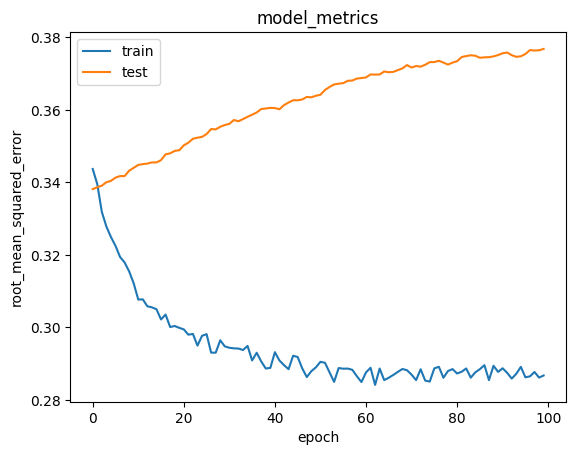

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Membuat plot menggunakan Matplotlib untuk memvisualisasikan metrik Root Mean Squared Error (RMSE) selama pelatihan. Grafik menampilkan RMSE pada set pelatihan ('train') dan set validasi ('test') terhadap jumlah epoch. Ini membantu dalam menilai kinerja model dan mendeteksi overfitting.

In [ ]:
wisata_df = new_wisata
df = rating_wisata_bandung

user_id = df.User_Id.sample(1).iloc[0]
wisata_visited_by_user = df[df.User_Id == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
wisata_not_visited = wisata_df[~wisata_df['id'].isin(wisata_visited_by_user.Place_Id.values)]['id']
wisata_not_visited = list(
    set(wisata_not_visited)
    .intersection(set(wisata_to_wisata_encoded.keys()))
)

wisata_not_visited = [[wisata_to_wisata_encoded.get(x)] for x in wisata_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_wisata_array = np.hstack(
    ([[user_encoder]] * len(wisata_not_visited), wisata_not_visited)
)

Menyiapkan data untuk mendapatkan rekomendasi untuk pengguna acak. Mengambil sampel ID pengguna secara acak. Mengidentifikasi wisata yang telah dikunjungi oleh pengguna tersebut. Kemudian, mengidentifikasi wisata yang belum dikunjungi pengguna dan yang memiliki ID yang dienkode. Data ini diubah menjadi format yang siap untuk dimasukkan ke dalam model untuk prediksi.

In [ ]:
ratings = model.predict(user_wisata_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_wisata_ids = [
    wisata_encoded_to_wisata.get(wisata_not_visited[x][0]) for x in top_ratings_indices
]

print('Menampilkan Rekomendasi wisata untuk wisatawan atau pengunjung: {}'.format(user_id))
print('===' * 9)
print('Wisata dengan rating tertinggi dari wisatawan atau pengunjung')
print('----' * 8)

top_wisata_user = (
    wisata_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

wisata_df_rows = wisata_df[wisata_df['id'].isin(top_wisata_user)]
for row in wisata_df_rows.itertuples():
    print(row.nama_wisata, ':', row.kategori_wisata)

print('----' * 8)
print('10 rekomendasi destinasi wisata Bandung')
print('----' * 8)

recommended_wisata = wisata_df[wisata_df['id'].isin(recommended_wisata_ids)]
for row in recommended_wisata.itertuples():
    print(row.nama_wisata, ':', row.kategori_wisata)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Menampilkan Rekomendasi wisata untuk wisatawan atau pengunjung: 213
Wisata dengan rating tertinggi dari wisatawan atau pengunjung
--------------------------------
Alun-Alun Kota Bandung : Taman Hiburan
Panghegar Waterboom Bandung : Taman Hiburan
Monumen Bandung Lautan Api : Budaya
Sudut Pandang Bandung : Taman Hiburan
Pemandian Air Panas Ciater : Cagar Alam
--------------------------------
10 rekomendasi destinasi wisata Bandung
--------------------------------
Selasar Sunaryo Art Space : Taman Hiburan
Teras Cikapundung BBWS : Taman Hiburan
Museum Pos Indonesia : Budaya
Masjid Agung Trans Studio Bandung : Tempat Ibadah
Museum Nike Ardilla : Budaya
Situ Patenggang : Cagar Alam
Glamping Lakeside Rancabali : Taman Hiburan
Bukit Jamur : Cagar Alam
Rainbow Garden : Cagar Alam
Kota Mini : Taman Hiburan
